<a href="https://colab.research.google.com/github/Piroon1123/choikeonwoo/blob/main/n212a_multiple_regression_ipynb_1%EC%B0%A8%EC%A0%9C%EC%B6%9C_%EC%B5%9C%EA%B1%B4%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [ ]:
# 1-1 테스트 데이터 (6980개)

test = df[df['date'].str.contains('2015')]
test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7,2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3,2.0,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21606,7936000429,20150326T000000,1007500.0,4,3.5,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.5,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,6600060120,20150223T000000,400000.0,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [ ]:
# 1-2 훈련 데이터 (14633개)

train = df[df['date'].str.contains('2014')]
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

#### 2-1. 기준모델 설정

In [ ]:
# 2-1-1 price의 평균

train['price'].mean()

539181.4284152258

In [ ]:
# 2-1-2 label 정의

target = 'price'
y_train = train[target]
y_test = test[target]

In [ ]:
# 2-1-3 price 평균값으로 예측 (기준모델)
predict = y_train.mean()
predict

539181.4284152258

#### 2-2 다중선형회귀 모델

In [ ]:
# 2-2-1 다중모델 학습을 위한 특성

features = ['bathrooms', 
            'sqft_living']
x = df[features]
X_train = train[features]
X_test = test[features]

In [ ]:
# 2-2-2 모델 fit (훈련 데이터)

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred1 = model.predict(X_train)

mae1 = mean_absolute_error(y_train, y_pred1)
print('훈련 에러 : ', mae1)

훈련 에러 :  170777.34212565765


In [ ]:
# 2-2-3 테스트 데이터

from sklearn.metrics import mean_absolute_error

y_pred2 = model.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred2)
print('테스트 에러 : ', mae2)

테스트 에러 :  179252.52593261775


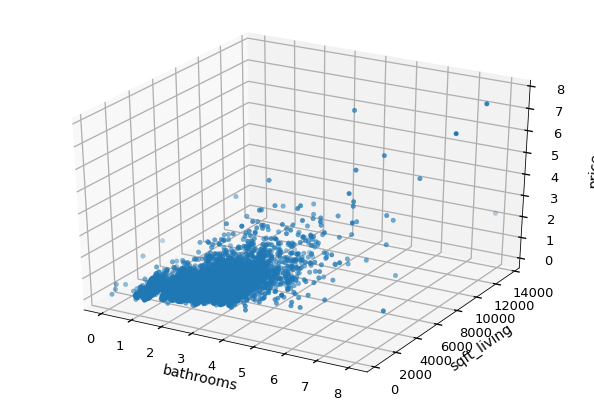

In [ ]:
# (참고) 시각화

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(train['bathrooms'], train['sqft_living'], train['price'])
ax.set_xlabel('bathrooms', labelpad=12)
ax.set_ylabel('sqft_living', labelpad=10)
ax.set_zlabel('price', labelpad=20)

plt.show()

### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
# 3-1 회귀계수 (coefficients)

b1, b2 = model.coef_
print('bathrooms : ',b1,'\nsqft_living : ' ,b2)

bathrooms :  -5158.925914109234 
sqft_living :  286.1375355497683


In [ ]:
# 3-2 절편 (intercept)

b0 = model.intercept_
b0

-50243.56279640319

### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [ ]:
# 4-1 MSE

from sklearn.metrics import  mean_squared_error

mse1 = mean_squared_error(y_train, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
print('훈련MSE : ', mse1,'\n테스트MSE : ', mse2)

훈련MSE :  67099053309.953606 
테스트MSE :  71083994178.75656


In [ ]:
# 4-2 RMSE

rmse1 = mse1 ** (0.5)
rmse2 = mse2 ** (0.5)
print('훈련RMSE : ', rmse1,'\n테스트RMSE : ', rmse2)

훈련RMSE :  259034.84960513248 
테스트RMSE :  266615.81757044455


In [ ]:
# 4-3 MAE

from sklearn.metrics import mean_absolute_error

mae1 = mean_absolute_error(y_train, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
print('훈련MAE : ', mae1,'\n테스트MAE : ', mae2)

훈련MAE :  170777.34212565765 
테스트MAE :  179252.52593261775


In [ ]:
# 4-4 R2

from sklearn.metrics import r2_score

r01 = r2_score(y_train, y_pred1)
r02 = r2_score(y_test, y_pred2)
print('훈련R2 : ', r01,'\n테스트R2 : ', r02)

훈련R2 :  0.5076085988757708 
테스트R2 :  0.45999300199894533


In [ ]:
# (참고) R2 구하는 다른 방법
rr1 = model.score(X_train, y_train)
rr2 = model.score(X_test, y_test)
print('훈련R2 : ', rr1,'\n테스트R2 : ', rr2)

훈련R2 :  0.5076085988757708 
테스트R2 :  0.45999300199894533


## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)